<a href="https://colab.research.google.com/github/Rajaguhan437/Cell_Detect-Quantitative-Representation/blob/main/Cell_Image_Quantitative_Analysis/Segmentation/SAM-seg/SAM_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Ninti/"

!git clone https://github.com/facebookresearch/segment-anything.git
!cd segment-anything; pip install -e .

/content/drive/MyDrive/Ninti
fatal: destination path 'segment-anything' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Ninti/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment-anything


In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-jwmjwbtz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-jwmjwbtz
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=63b02fbf437a307684a47716b79420167d13825fe5a858f0efcda64b57ea6b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-u4_j_1sh/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
  Attempting uninstall: segment-anything
    Found existing installation: segment-anything 1.0
    Uninstalling segment-anything-1.0:
      Successfully uninstalled segment-

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry,  SamAutomaticMaskGenerator, SamPredictor

In [ ]:
if not os.path.exists("/content/drive/MyDrive/Ninti/segment-anything/sam_vit_h_4b8939.pth"):
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O /content/drive/MyDrive/Ninti/segment-anything/sam_vit_h_4b8939.pth

--2023-06-22 09:16:35--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.224.2.21, 13.224.2.88, 13.224.2.42, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.224.2.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘/content/drive/MyDrive/Ninti/segment-anything/sam_vit_h_4b8939.pth’

/content/drive/MyDr 100%[===================>]   2.39G  62.4MB/s    in 41s     

2023-06-22 09:17:16 (59.7 MB/s) - ‘/content/drive/MyDrive/Ninti/segment-anything/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
### initialize the SAM

sam_chkpt = "/content/drive/MyDrive/Ninti/segment-anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_chkpt)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.99, #a filtering threshold in [0,1], using the model's predicted mask quality
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100  #requires open-cv to run post-processsing
)

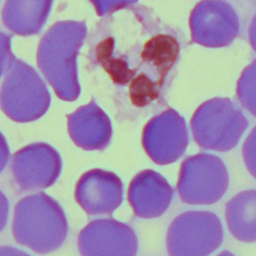

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Ninti/unzipped_dataset/images/image-1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

In [ ]:
masks = mask_generator.generate(image)

### Printing no. of masks and keys attached to each of them
print("Number of masks generated:", len(masks))
print(masks[0].keys())

Number of masks generated: 20
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


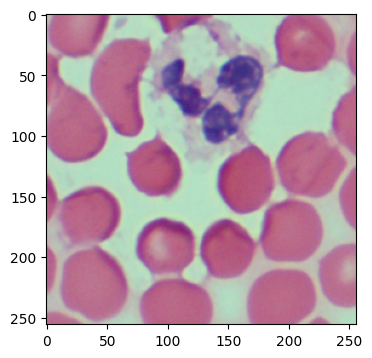

In [ ]:
inp_img = "/content/drive/MyDrive/Ninti/unzipped_dataset/images/image-1.png"
fig=plt.figure(figsize=(4, 5))
img = plt.imread(inp_img)
plt.imshow(img)
plt.show()

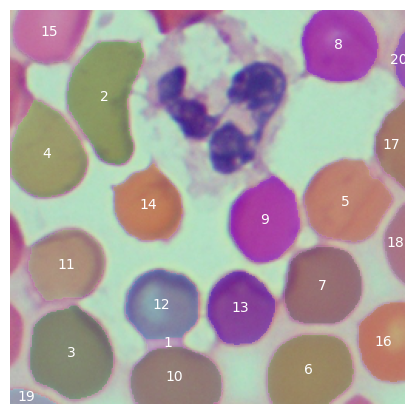

In [ ]:
import pycocotools

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    mask_num = 1  # initialize mask number
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
        # Get segmentation center and display mask number
        y, x = np.where(m)
        center = np.array([int(np.mean(x)), int(np.mean(y))])
        ax.text(center[0], center[1], str(mask_num), color='white', fontsize=10, ha='center', va='center')
        mask_num += 1  # increment mask number

    ax.imshow(img)

### Displaying the masks, witha number identfying each of them
plt.figure(figsize=(5.12, 5.12))
plt.imshow(image)
show_anns(masks[:]) ## use masks[:-x] to only display the masks of the list
plt.axis('off')

### Saving this image
plt.savefig('/content/drive/MyDrive/Ninti/segment_overlay.jpg', dpi=300, bbox_inches='tight')
plt.show()